Objective: 
To understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



In [83]:
#load the libraries

import pandas as pd #To woek with dataset
import numpy as np #math library
import matplotlib.pyplot as plt#Data Visualization Libraries
import seaborn as sns #Data Visualization Libraries
import warnings 
warnings.filterwarnings('ignore')

In [84]:
#Import the Data

df=pd.read_csv("loan.csv")
df.shape #shape of the data rows, columns


(39717, 111)

In [85]:
#summary of the dataframe including data types, shape and memory storage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [86]:
#Looking the data - first 10 records

df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN



Exclusion Criteria:

Loans which are Fully Paid or Charged Off are considered for this analysis as "Current" customers are still repaying loans so excluded them from this analysis.

In [87]:
#drop the records which are having loan_status as Curent
df.drop(df[df["loan_status"]=="Current"].index, inplace=True)
#create new variable for laon status: Charged off =1, Fully Paid =0
#df["loan_status"]=np.where(df["loan_status"]=="Charged Off",1,0)

df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [9]:
#Missing value percentage column wise
round(100*df.isna().mean())

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [10]:
# drop all the columns having more than 85% missing values 

df=df.dropna(thresh=len(df)*.85, axis='columns')
print(df.shape) # now only 53 columns are present out of111
#Afetr dropping the colsumns having 85% mising check how many columns are left and their missing percentage

print(round(100*df.isna().mean())) 

#Columns emp_title : 6% , emp_length :3% , pub_rec_bankruptcies : 2% missing value


(38577, 53)
id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
re

In [11]:
#Count of unique values columns wise

for i in df.columns:
        print(i, df[i].nunique())

id 38577
member_id 38577
loan_amnt 870
funded_amnt 1019
funded_amnt_inv 8050
term 2
int_rate 370
installment 15022
grade 7
sub_grade 35
emp_title 28027
emp_length 11
home_ownership 5
annual_inc 5215
verification_status 3
issue_d 55
loan_status 2
pymnt_plan 1
url 38577
purpose 14
title 19297
zip_code 822
addr_state 50
dti 2853
delinq_2yrs 11
earliest_cr_line 524
inq_last_6mths 9
open_acc 40
pub_rec 5
revol_bal 21275
revol_util 1088
total_acc 82
initial_list_status 1
out_prncp 1
out_prncp_inv 1
total_pymnt 36714
total_pymnt_inv 36387
total_rec_prncp 6841
total_rec_int 34025
total_rec_late_fee 1320
recoveries 4040
collection_recovery_fee 2616
last_pymnt_d 101
last_pymnt_amnt 34418
last_credit_pull_d 106
collections_12_mths_ex_med 1
policy_code 1
application_type 1
acc_now_delinq 1
chargeoff_within_12_mths 1
delinq_amnt 1
pub_rec_bankruptcies 3
tax_liens 1


In [13]:

#Drop the Columns having same value for all rows or in this case having distinct values for all rows-- these columns do not have any significance

col_list=[i for i in df.columns if df[i].nunique()==len(df)  or ( df[i].nunique() ==1 )]
m_loandata=df.drop(columns=col_list, axis=0) 

m_loandata.shape # now we have 39 columns only


(38577, 39)

In [14]:
m_loandata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                38577 non-null  int64  
 1   funded_amnt              38577 non-null  int64  
 2   funded_amnt_inv          38577 non-null  float64
 3   term                     38577 non-null  object 
 4   int_rate                 38577 non-null  object 
 5   installment              38577 non-null  float64
 6   grade                    38577 non-null  object 
 7   sub_grade                38577 non-null  object 
 8   emp_title                36191 non-null  object 
 9   emp_length               37544 non-null  object 
 10  home_ownership           38577 non-null  object 
 11  annual_inc               38577 non-null  float64
 12  verification_status      38577 non-null  object 
 13  issue_d                  38577 non-null  object 
 14  loan_status           

In [15]:

#Rename the issue_ column as issue_month
m_loandata.rename(columns={'issue_d': 'issue_month'}, inplace=True)

In [173]:
m_loandata.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_month',
       'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

#The Column int_rate is having data type as object, need to convert it into float to do numerical analysis.


In [16]:
#Observation: Column int_rate is having data type as object, need to convert it into numeric
#all date columns are also to be converted into numeric
m_loandata["int_rate"]=m_loandata["int_rate"].str[:-1].astype('float')

m_loandata["issue_month"]=m_loandata['issue_month'].str[0:3] # Issue month 

m_loandata["int_rate"]
m_loandata["issue_month"].value_counts()


Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_month, dtype: int64


# Coulmns significant to the current analysis are identified as below:

The customers behavior variables were not available at the time of loan application and 
thus can not be used as predtcors for credit approval

#### loan_amnt (Loan amount as applied by borrower)
#### funded_amnt_inv (Amount actually approved)
#### term (Term of loan in months)
#### int_rate (Interest rate in %)
#### grade
#### sub_grade
#### annual_inc (Annual income)
#### purpose (Purpose of loan)
#### dti (Debt to Income ratio)
#### emp_lenght (Years of employment)
#### Loan_Date (Month)
#### home_ownership
#### verification_status
#### installment

In [17]:
#cloumns list

cols_list=['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade',  'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_month',
       'loan_status', 'purpose', 'dti']
len(cols_list)
#select these columns for our analysis

m_loandata=m_loandata.loc[ : ,cols_list]
print(m_loandata.shape)

(38577, 15)


In [18]:
#List of columns as per data types

num_cols=m_loandata._get_numeric_data().columns #numrical columns
cat_cols = list(set(cols_list)- set(num_cols)) #categorical columns
print(num_cols)
print(cat_cols)

Index(['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc',
       'dti'],
      dtype='object')
['home_ownership', 'emp_length', 'purpose', 'issue_month', 'grade', 'sub_grade', 'loan_status', 'term', 'verification_status']


In [19]:
#value counts to check any absured values in categorical varibales- There are no absured value are pfesent

for i in cat_cols:
    print(i)
    print(m_loandata[i].value_counts(normalize=True))

home_ownership
RENT        0.479042
MORTGAGE    0.441221
OWN         0.077118
OTHER       0.002540
NONE        0.000078
Name: home_ownership, dtype: float64
emp_length
10+ years    0.226081
< 1 year     0.120072
2 years      0.114293
3 years      0.106861
4 years      0.089016
5 years      0.085074
1 year       0.084408
6 years      0.057746
7 years      0.045573
8 years      0.038222
9 years      0.032655
Name: emp_length, dtype: float64
purpose
debt_consolidation    0.468025
credit_card           0.130311
other                 0.100189
home_improvement      0.074526
major_purchase        0.055733
small_business        0.045468
car                   0.038857
wedding               0.024004
medical               0.017653
moving                0.014931
vacation              0.009721
house                 0.009513
educational           0.008425
renewable_energy      0.002644
Name: purpose, dtype: float64
issue_month
Dec    0.109262
Nov    0.103844
Oct    0.097493
Sep    0.090676
Aug    0.

In [20]:
#Summary Stats for the numerical varibales num_cols:
m_loandata.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,38577.0,11047.025430,7348.441646,500.00,5300.00,9600.00,15000.00,35000.00
funded_amnt_inv,38577.0,10222.481123,7022.720644,0.00,5000.00,8733.44,14000.00,35000.00
int_rate,38577.0,11.932219,3.691327,5.42,8.94,11.71,14.38,24.40
installment,38577.0,322.466318,208.639215,15.69,165.74,277.86,425.55,1305.19
annual_inc,38577.0,68777.973681,64218.681802,4000.00,40000.00,58868.00,82000.00,6000000.00
dti,38577.0,13.272727,6.673044,0.00,8.13,13.37,18.56,29.99



For Numrical variables we are creating bins to check the relationship of each variables in different buckets with loan status.  

In [88]:
#Bin for loan_amnt

loan_amt_bin=[0,3000,6000,9000,12000,15000,18000,21000,24000,27000,50000]
loan_amt_lbl=["<3K","3K-6K","6K-9K","9K-12K","12K-15k","15K-18K","18K-21K","21K-24K","24K-27K",">27K"]

m_loandata["loan_amnt_cat"]=pd.cut(m_loandata.loan_amnt, bins=loan_amt_bin, labels=loan_amt_lbl)

#bin for income 

income_bin=[0,10000,20000,30000,40000,50000,60000,70000,80000,100000,99999999]
income_lbl=["<10K","10K-20K","20K-30K","30k-40K","40K-50K","50K-60K","60K-70K","70k-80K","80K-100K",">100K"]
m_loandata["annual_inc_cat"]=pd.cut(m_loandata.annual_inc, bins=income_bin, labels= income_lbl)

#bin for funded_amnt_inv

funded_amnt_inv_bin=[0,3000,6000,9000,12000,15000,18000,21000,24000,27000,50000]
funded_amnt_inv_lbl=["<3K","3K-6K","6K-9K","9K-12K","12K-15k","15K-18K","18K-21K","21K-24K","24K-27K",">27K"]

m_loandata["funded_amnt_cat"]=pd.cut(m_loandata.funded_amnt_inv, bins= funded_amnt_inv_bin  ,  labels= funded_amnt_inv_lbl)

# bin installment

installment_bin=[0,50,100,150,200,250,300,350,400,450,1500]
installment_lbl=["<50","51-100","101-150","151-200","201-250","251-300","301-350","351-400","401-450","500"]

m_loandata["installment_cat"]=pd.cut(m_loandata.installment, bins=installment_bin, labels=installment_lbl)


# int_rate

int_rt_bin=[ 0,7.5,8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,30]
int_rt_lbl=["<7.5","7.51-8.5","8.51-9.5","9.51-10.5","10.51-11.5","11.51-12.5",
            "12.51-13.5","13.51-14.5","14.51-15.5",">15.5"]

m_loandata["int_rate_cat"]=pd.cut(m_loandata.int_rate, bins=int_rt_bin, labels=int_rt_lbl)

#bin for dti

dti_bins=[0,5.5, 7.5,9.5,11.5,13.5,15.5,17.5,19.5,21.5,99]
dti_lbl=["<5.5","5.51-7.5","7.51-9.5","9.51-11.5","11.51-13.5","13.51-15.5","15.51-17.5","17.51-19.5","19.51-21.5",">21.5"]

m_loandata["dti_cat"]=pd.cut(m_loandata.dti, bins=dti_bins,   labels=  dti_lbl)
print(len(dti_bins))
print(len(dti_lbl))
m_loandata.head()

11
10


,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_month,loan_status,purpose,dti,loan_amnt_cat,annual_inc_cat,funded_amnt_cat,installment_cat,int_rate_cat,dti_cat
0,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,Dec,Fully Paid,credit_card,27.65,3K-6K,20K-30K,3K-6K,151-200,10.51-11.5,>21.5
1,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec,Charged Off,car,1.00,<3K,20K-30K,<3K,51-100,14.51-15.5,<5.5
2,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,Dec,Fully Paid,small_business,8.72,<3K,10K-20K,<3K,51-100,>15.5,7.51-9.5
3,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,Dec,Fully Paid,other,20.00,9K-12K,40K-50K,9K-12K,301-350,12.51-13.5,19.51-21.5
5,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,...,Dec,Fully Paid,wedding,11.20,3K-6K,30k-40K,3K-6K,151-200,7.51-8.5,9.51-11.5


Note: Number of variables are increases as the bins are created for above numerical variables.

In [22]:
#Lis of all categorical variables in the dataset
cat_cols=cat_cols+['loan_amnt_cat','funded_amnt_cat','installment_cat','int_rate_cat','dti_cat', 'annual_inc_cat']

In [23]:
#List of call categocial vars
print(cat_cols)

['home_ownership', 'emp_length', 'purpose', 'issue_month', 'grade', 'sub_grade', 'loan_status', 'term', 'verification_status', 'loan_amnt_cat', 'funded_amnt_cat', 'installment_cat', 'int_rate_cat', 'dti_cat', 'annual_inc_cat']


All these numerical variablea are converted into bins  to get a better understanding of the trend of these vars:
    
The mean value of these variables in their respective segment are shown below:

In [24]:
# mean value of laon amount in different bins to understand how close they are in lower end or higher end of the bucket
m_loandata.pivot_table(index='loan_amnt_cat', values='loan_amnt',aggfunc='mean').sort_index(ascending=False)

,loan_amnt
loan_amnt_cat,
>27K,32226.203209
24K-27K,25015.911892
21K-24K,23086.561562
18K-21K,19907.469188
15K-18K,16766.459760
12K-15k,14183.525839
9K-12K,10737.685522
6K-9K,7655.086289
3K-6K,4868.566111


In [25]:
#funded amount inv
## mean value in different bins to understand how close they are in lower end or higher end of the bucket
m_loandata.pivot_table(index='funded_amnt_cat', values='funded_amnt_inv',aggfunc='mean').sort_index(ascending=False)

,funded_amnt_inv
funded_amnt_cat,
>27K,31836.497853
24K-27K,24915.472711
21K-24K,22884.570336
18K-21K,19716.810419
15K-18K,16616.461614
12K-15k,13989.434215
9K-12K,10656.357860
6K-9K,7601.401430
3K-6K,4805.663525


In [26]:

#int rate
## mean value in different bins to understand how close they are in lower end or higher end of the bucket
m_loandata.pivot_table(index='int_rate_cat', values='int_rate',aggfunc='mean').sort_index(ascending=False)

,int_rate
int_rate_cat,
>15.5,17.573504
14.51-15.5,14.976599
13.51-14.5,14.005460
12.51-13.5,13.044505
11.51-12.5,11.983847
10.51-11.5,11.031680
9.51-10.5,10.040315
8.51-9.5,8.972699
7.51-8.5,7.860591


In [27]:
#annual income
## mean value in different bins to understand how close they are in lower end or higher end of the bucket
m_loandata.pivot_table(index='annual_inc_cat',values='annual_inc',aggfunc='mean').sort_index(ascending=False) 

,annual_inc
annual_inc_cat,
>100K,153670.778672
80K-100K,90422.840120
70k-80K,75645.646655
60K-70K,65805.372664
50K-60K,55964.329417
40K-50K,45888.114959
30k-40K,36162.840968
20K-30K,26380.315182
10K-20K,16406.142227


In [28]:
#insatllment 
## mean value in different bins to understand how close they are in lower end or higher end of the bucket
m_loandata.pivot_table(index='installment_cat', values='installment',aggfunc='mean').sort_index(ascending=False)

,installment
installment_cat,
500,633.084928
401-450,422.153163
351-400,375.317903
301-350,324.191915
251-300,273.604499
201-250,225.048917
151-200,174.132160
101-150,124.653901
51-100,78.571411


In [89]:
#dti --debt to income ratio
## mean value in different bins to understand how close they are in lower end or higher end of the bucket
m_loandata.pivot_table(index='dti_cat', values='dti',aggfunc='mean').sort_index(ascending=False)

,dti
dti_cat,
>21.5,23.656543
19.51-21.5,20.468405
17.51-19.5,18.489566
15.51-17.5,16.493199
13.51-15.5,14.501681
11.51-13.5,12.534035
9.51-11.5,10.518998
7.51-9.5,8.528105
5.51-7.5,6.530232


# Univariate Analysis

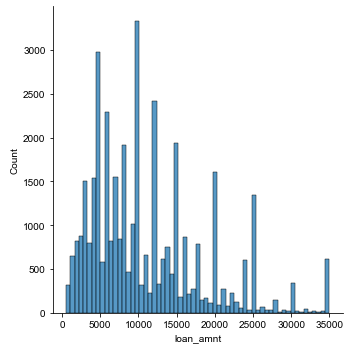

In [36]:
#Univariate analysis - Loan amount requested (Amount applied for by the customer)


sns.displot(x='loan_amnt', data=m_loandata);

sns.set(rc = {'figure.figsize':(10,8)})

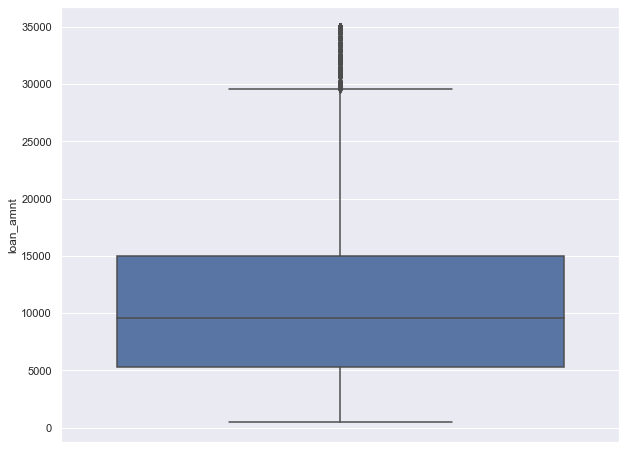

In [37]:
#Univariate analysis - Loan amount


sns.boxplot(y='loan_amnt', data=m_loandata);

# Observation: Median loan amount demand is 9600.  50% of demand amounts are between amount of 5300 to 15000


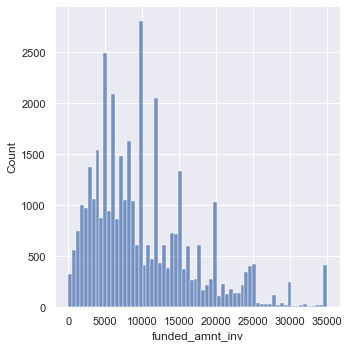

In [38]:
#Loan amount funded (Final loan amount received by customer)

sns.displot(x='funded_amnt_inv', data=m_loandata);



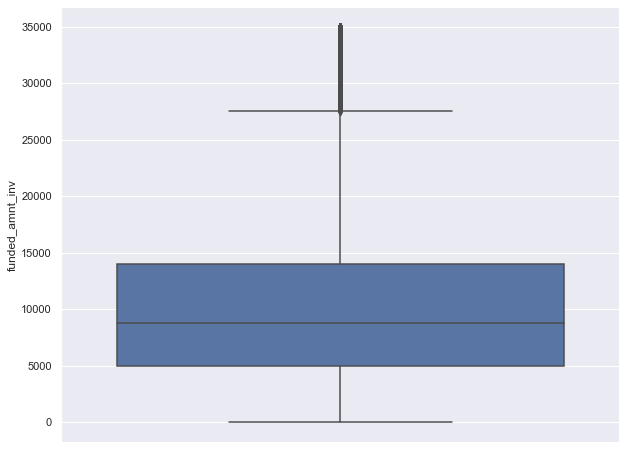

In [39]:
sns.boxplot(y='funded_amnt_inv', data=m_loandata);

# Observation: Median loan amount funded is 8733.  50% of approved amounts are between amount of 5000 to 14000


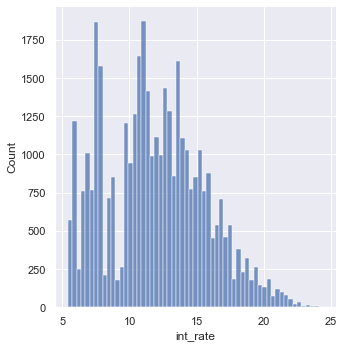

In [40]:
sns.displot(x='int_rate', data=m_loandata);#most the int_rate are lies between 10 to 17 percent

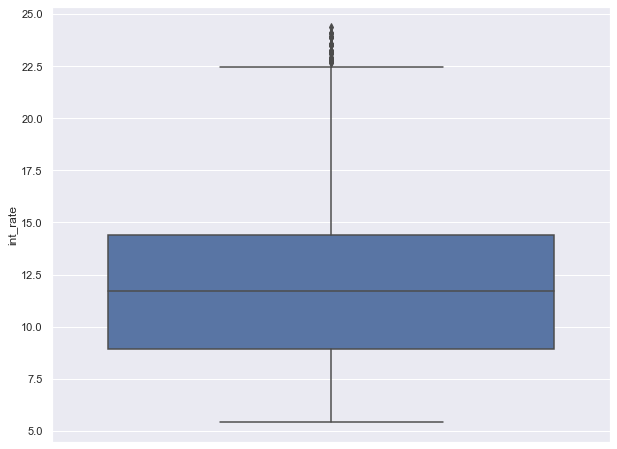

In [41]:
sns.boxplot(y='int_rate', data=m_loandata);# outliers are present which are having interest rate higher than 22.5 

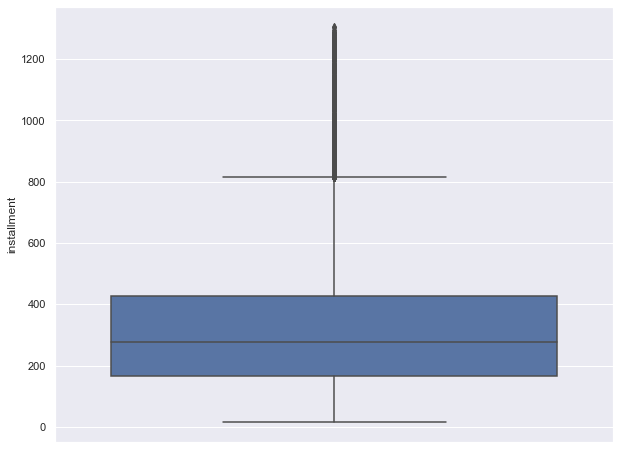

In [42]:
sns.boxplot(y='installment', data=m_loandata);#outlier are present for installment

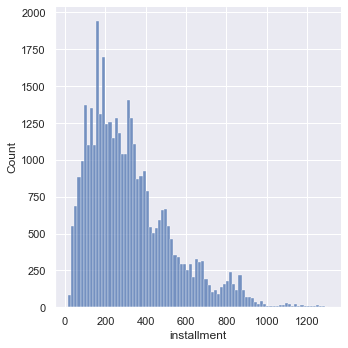

In [43]:
sns.displot(x='installment', data=m_loandata);

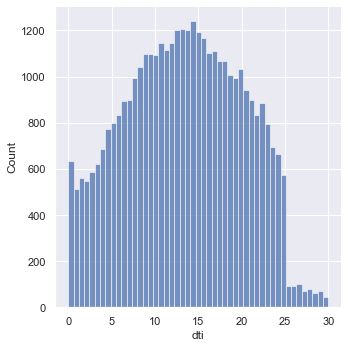

In [44]:
sns.displot(x="dti", data=m_loandata) #most of the dti are between 5 to 25 percent, median is 13.37


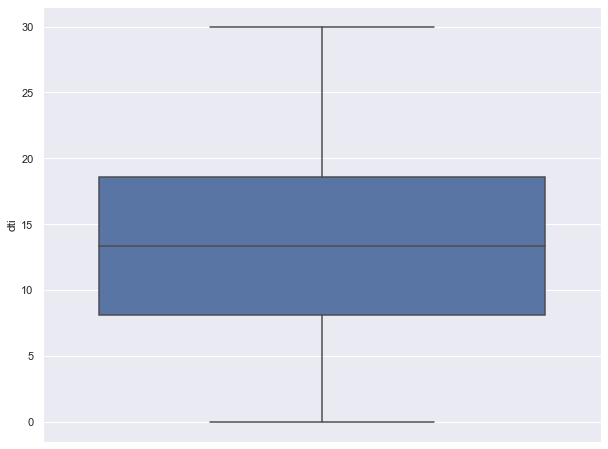

In [45]:
sns.boxplot(y='dti', data=m_loandata); #There is no Outlier in dti

Coorelation Analysis for the numeric variables:

<AxesSubplot:>

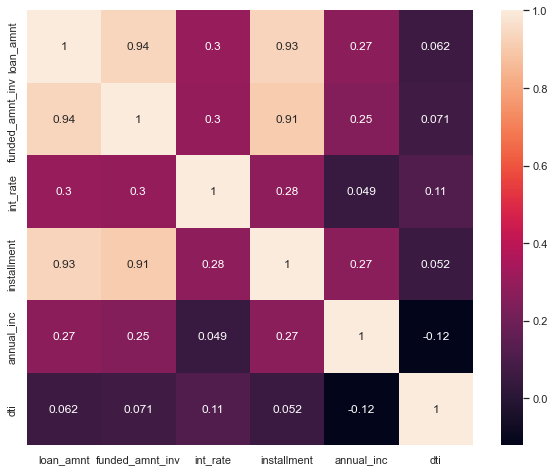

In [46]:
sns.heatmap(m_loandata[num_cols].corr(), annot=True)

obsevations: variable funded_amnt_inv are highly correlated with laon amount -- correlation coeffienct is .94
    ## funded_amnt_inv - installment is .91
   
    ## dti is negatively least correlated with annual income. higher the income lower is the debt to income ratio.
    

Outlier for numeric vars:

Except variable dti - all other numerical variables are having outliers. Outliers are included for this analysis

#Univariate Analysis for Cateogorical variables - Segmented Analysis

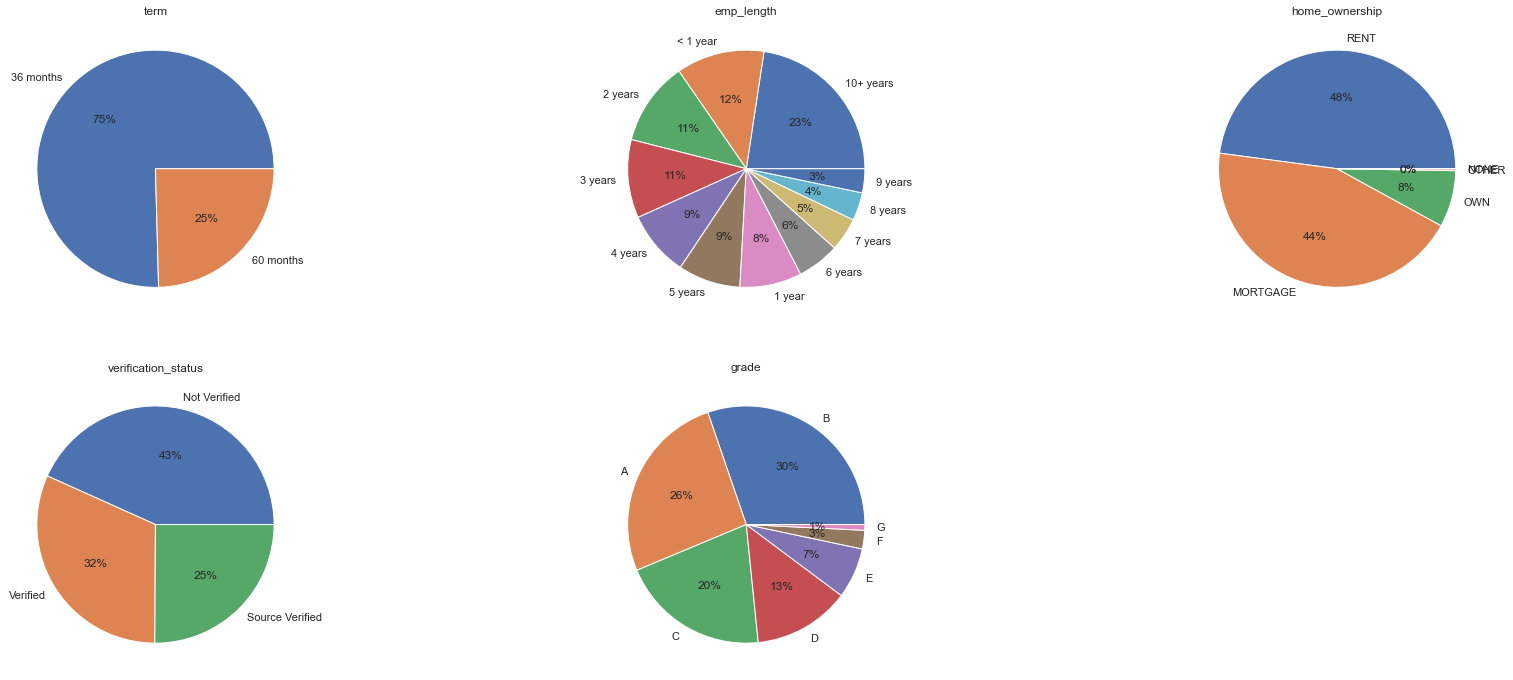

In [47]:
# Univariate analysis: Pie charts showing share of Loan term, Employment length, home ownership type, verification status,grade 
# in total loans

cats = ['term', 'emp_length', 'home_ownership', 'verification_status','grade']
plt.figure(figsize = (30,12))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.pie(m_loandata[cats[i]].value_counts(), labels = m_loandata[cats[i]].value_counts().index, autopct = '%0.f%%')
    #plt.title('Chart of '+cats[i])
    plt.title(cats[i])
    #plt.tight_layout()

Major population under each categories are:
    #term -- 36 months,
    #emp_length -- >=10+ yrs and <=3yrs
    #home_ownership-- rent & mortage
    #verrification -- 43% are not verified
    #grades --B,followed by A & C
    

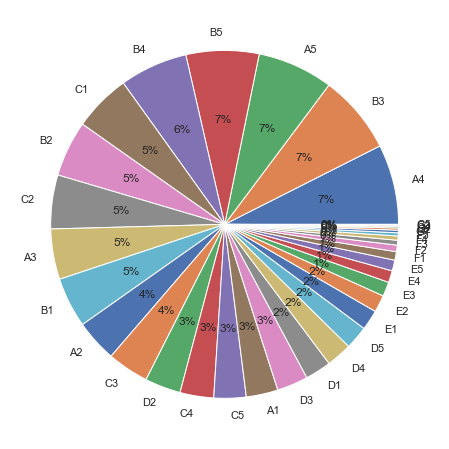

In [48]:
# Share of each LC assigned sub_grade

plt.pie(m_loandata['sub_grade'].value_counts(), labels = m_loandata['sub_grade'].value_counts().index, autopct= '%0.f%%');

#The major sub garde under each grades are:
#A:A4,A5,A3
#B:B3,B5,B4,B2
#C:C1,C2

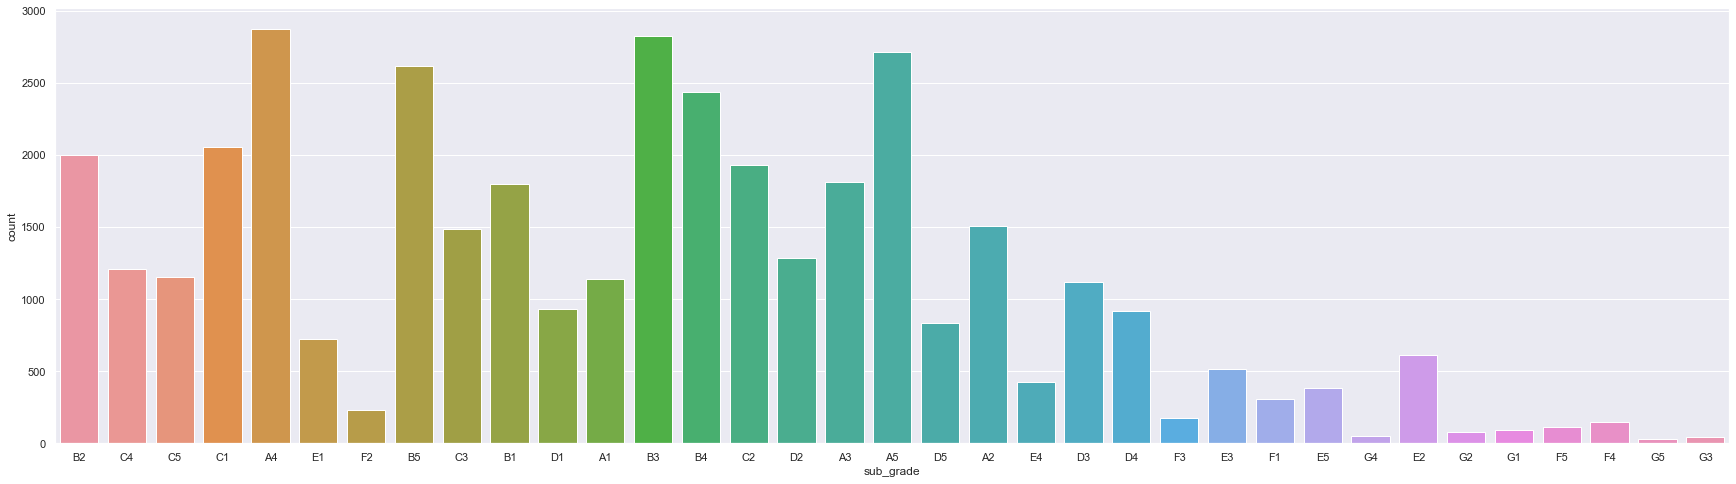

In [118]:
sns.set(rc = {'figure.figsize':(30,8)})# since there are manysub grade so fig size changes for better view
sns.countplot(x='sub_grade', data = m_loandata);


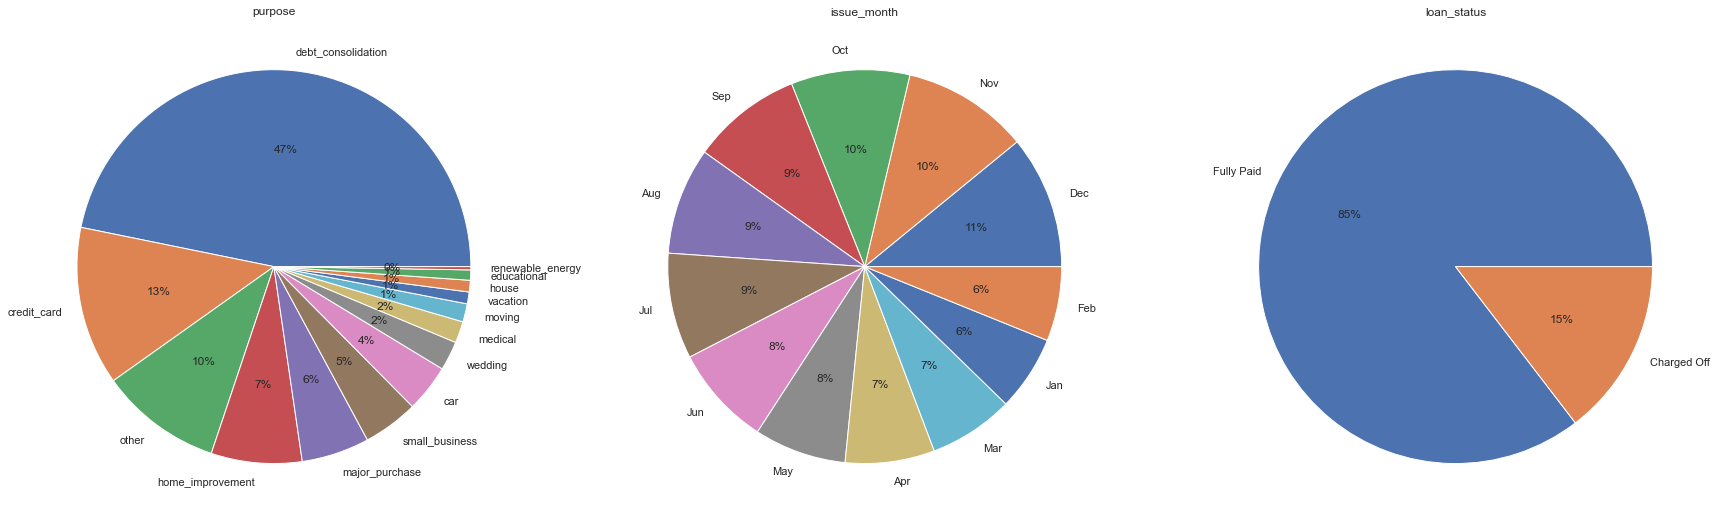

In [49]:
# Univariate analysis: Pie charts showing share of pupose, issue_month, loan_status 
# in total loans

cats = ['purpose', 'issue_month', 'loan_status']
plt.figure(figsize = (30,12))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.pie(m_loandata[cats[i]].value_counts(), labels = m_loandata[cats[i]].value_counts().index, autopct = '%0.f%%')
    #plt.title('Chart of '+cats[i])
    plt.title(cats[i])
    #plt.tight_layout()

#Segmented Univariate Analysis for categorical variables

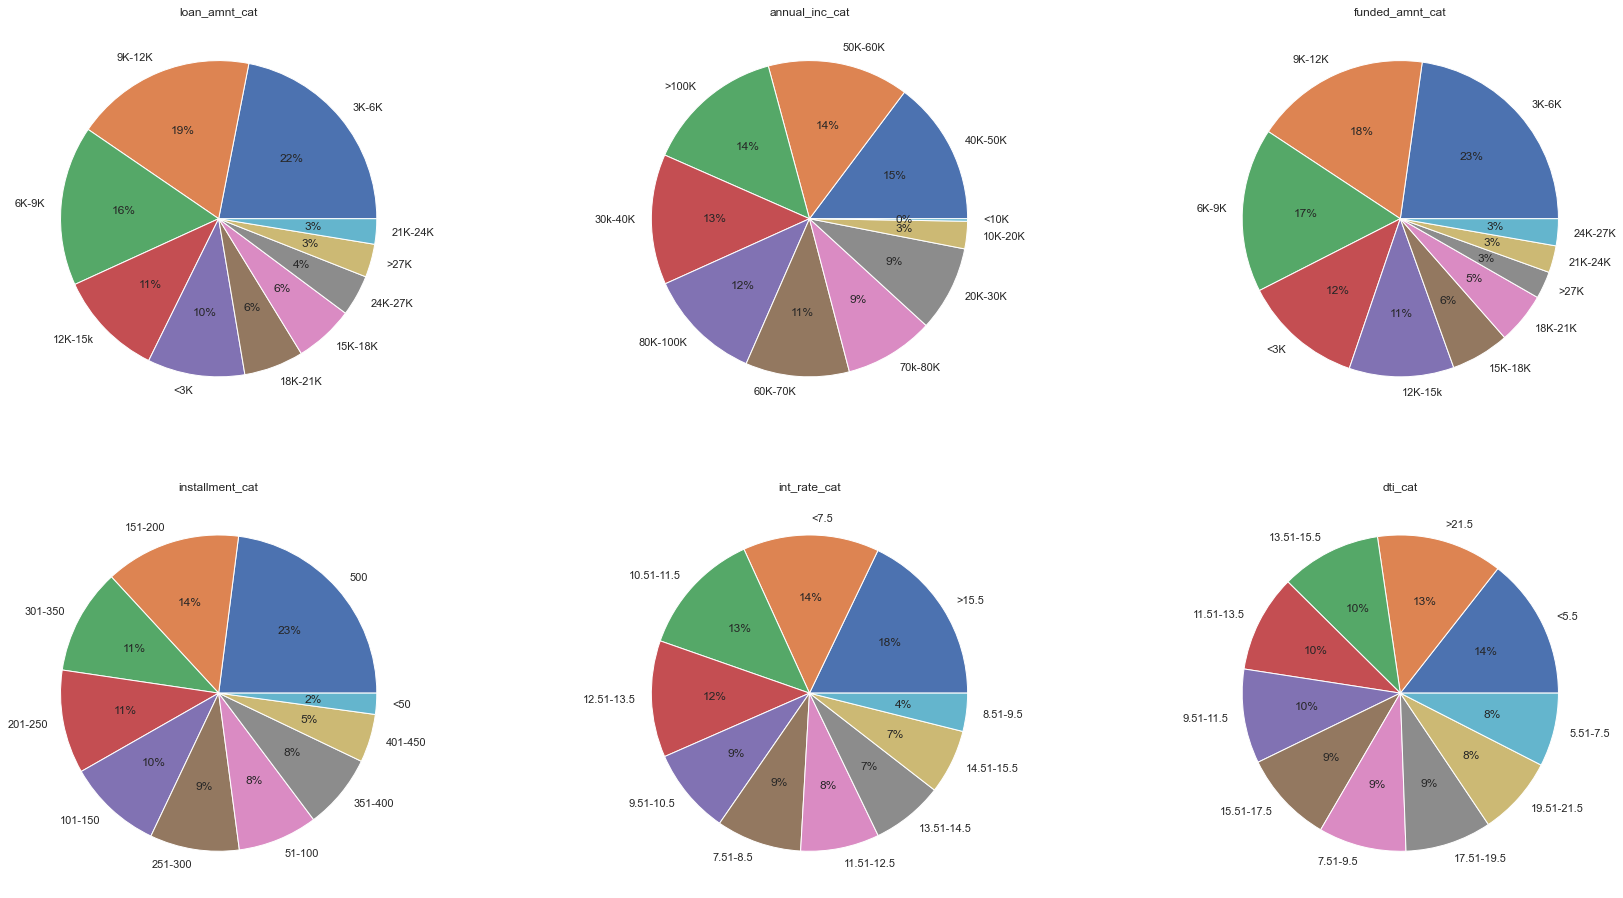

In [90]:
#Pie chart for the  categorical colums which are created from bins:

var_list=['loan_amnt_cat', 'annual_inc_cat', 'funded_amnt_cat', 'installment_cat','int_rate_cat', 'dti_cat']
plt.figure(figsize=(30,16))
for i in range(len(var_list)):
    plt.subplot(2,3,i+1)
    plt.pie(m_loandata[var_list[i]].value_counts(), labels=m_loandata[var_list[i]].value_counts().index, autopct='%0.f%%')
    #plt.title('Chart of '+"  " +var_list[i])
    plt.title(var_list[i])
    

Bivariate Analysis : To understand how each variables(and their segments) are related with  Loan Status.

In [53]:
sns.set(rc = {'figure.figsize':(8,6)}) # reset the chart size

Creating cross tab bewteen loan status and other vars:

In [63]:
loan_amt_tb=pd.crosstab(m_loandata['loan_amnt_cat'], m_loandata['loan_status'], normalize='index')
print(loan_amt_tb)

#Observation:  Charge off are high for loan amount >27K

loan_status    Charged Off  Fully Paid
loan_amnt_cat                         
<3K               0.142820    0.857180
3K-6K             0.129505    0.870495
6K-9K             0.131254    0.868746
9K-12K            0.131896    0.868104
12K-15k           0.141939    0.858061
15K-18K           0.180651    0.819349
18K-21K           0.167871    0.832129
21K-24K           0.194194    0.805806
24K-27K           0.197782    0.802218
>27K              0.216960    0.783040


<Figure size 288x288 with 0 Axes>

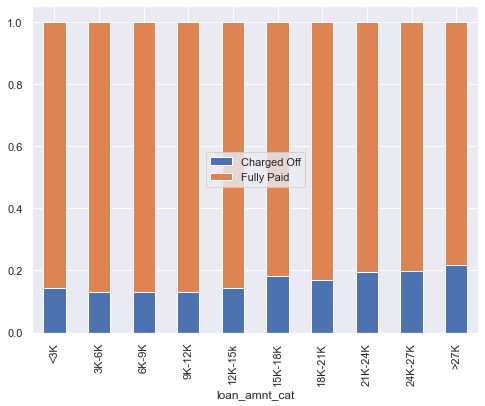

In [54]:
plt.figure(figsize=(4,4))
#print(finalamt_chkb)
loan_amt_tb.plot.bar(stacked = True);
plt.legend(loc='center');

Loan amount >15K the chances of charged off are high

loan_status     Charged Off  Fully Paid
annual_inc_cat                         
<10K               0.204082    0.795918
10K-20K            0.200555    0.799445
20K-30K            0.178582    0.821418
30k-40K            0.177191    0.822809
40K-50K            0.151467    0.848533
50K-60K            0.155599    0.844401
60K-70K            0.136475    0.863525
70k-80K            0.131915    0.868085
80K-100K           0.117634    0.882366
>100K              0.108009    0.891991


<Figure size 288x288 with 0 Axes>

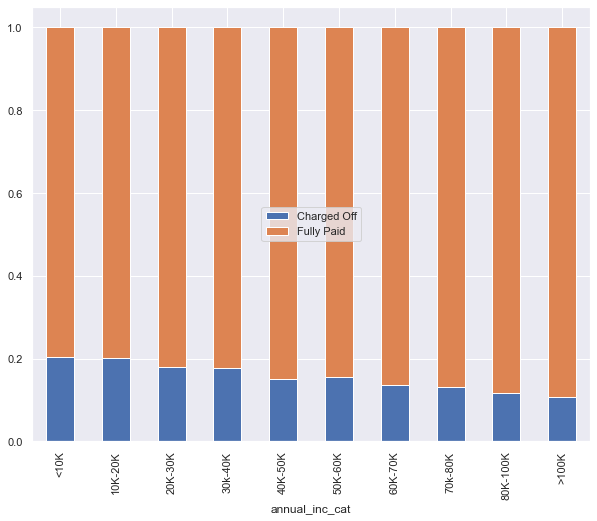

In [62]:
#Annual income
annual_inc_tb=pd.crosstab(m_loandata['annual_inc_cat'], m_loandata['loan_status'], normalize='index')
print(annual_inc_tb)
plt.figure(figsize=(4,4))
annual_inc_tb.plot.bar(stacked = True)
plt.legend(loc='center')



Observation: High Income - Low charged off and it is showing rank order

loan_status      Charged Off  Fully Paid
funded_amnt_cat                         
<3K                 0.152851    0.847149
3K-6K               0.135502    0.864498
6K-9K               0.129627    0.870373
9K-12K              0.131002    0.868998
12K-15k             0.140811    0.859189
15K-18K             0.182253    0.817747
18K-21K             0.178571    0.821429
21K-24K             0.199245    0.800755
24K-27K             0.159735    0.840265
>27K                0.199065    0.800935


<Figure size 288x288 with 0 Axes>

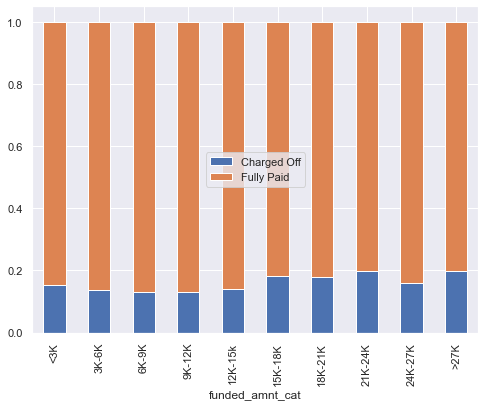

In [58]:
#funded amt


funded_amt_tb=pd.crosstab(m_loandata['funded_amnt_cat'], m_loandata['loan_status'], normalize='index')
print(funded_amt_tb)
plt.figure(figsize=(4,4))
funded_amt_tb.plot.bar(stacked = True);
plt.legend(loc='center');

#Funded amount >27 are most likely to charge off-- it shows the simillar trend of loan amount

loan_status      Charged Off  Fully Paid
installment_cat                         
<50                 0.162260    0.837740
51-100              0.147807    0.852193
101-150             0.139119    0.860881
151-200             0.129322    0.870678
201-250             0.132501    0.867499
251-300             0.149504    0.850496
301-350             0.130758    0.869242
351-400             0.151894    0.848106
401-450             0.158697    0.841303
500                 0.163509    0.836491


<Figure size 288x288 with 0 Axes>

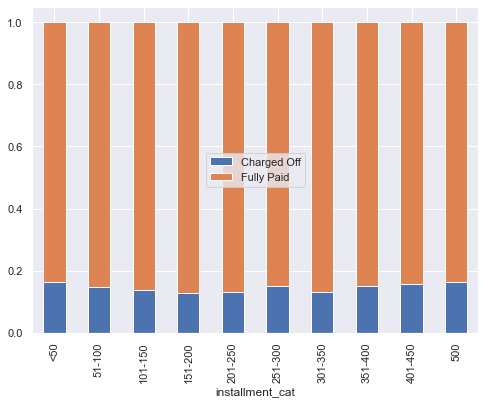

In [59]:
instal_cat_tb = pd.crosstab(m_loandata['installment_cat'], m_loandata['loan_status'], normalize='index')
print(instal_cat_tb)
plt.figure(figsize=(4,4))
instal_cat_tb.plot.bar(stacked = True);
plt.legend(loc='center');

Installment ranges 51 to 200 are less likely to charge off as compare to lower installment(<50) or higher installment(>300)

loan_status   Charged Off  Fully Paid
int_rate_cat                         
<7.5             0.047672    0.952328
7.51-8.5         0.070686    0.929314
8.51-9.5         0.082447    0.917553
9.51-10.5        0.106533    0.893467
10.51-11.5       0.123158    0.876842
11.51-12.5       0.152062    0.847938
12.51-13.5       0.158409    0.841591
13.51-14.5       0.173192    0.826808
14.51-15.5       0.194030    0.805970
>15.5            0.268339    0.731661


<Figure size 720x576 with 0 Axes>

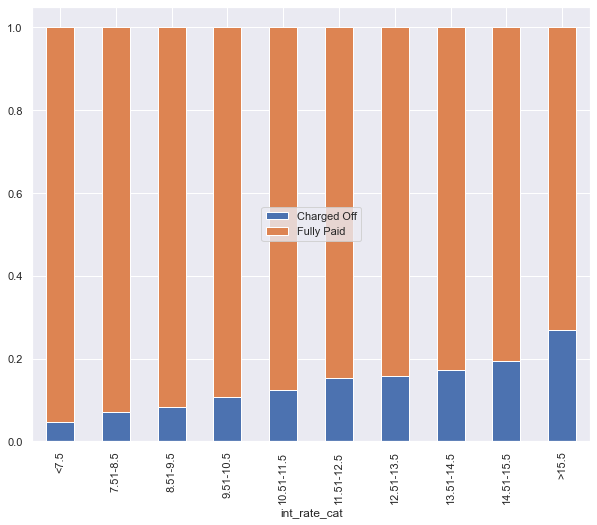

In [60]:
#Interest Rate 


int_rate_cat = pd.crosstab(m_loandata['int_rate_cat'], m_loandata['loan_status'], normalize='index')
print(int_rate_cat)

sns.set(rc = {'figure.figsize':(10,8)})
plt.figure(figsize=(10,8))
#print(finalamt_chkb)
int_rate_cat.plot.bar(stacked = True);
plt.legend(loc='center');

Note: More the interest rates more are the chance of charged off. following the rank order.

loan_status  Charged Off  Fully Paid
dti_cat                             
<5.5            0.121322    0.878678
5.51-7.5        0.121275    0.878725
7.51-9.5        0.136680    0.863320
9.51-11.5       0.128579    0.871421
11.51-13.5      0.149569    0.850431
13.51-15.5      0.149632    0.850368
15.51-17.5      0.155125    0.844875
17.51-19.5      0.162832    0.837168
19.51-21.5      0.172092    0.827908
>21.5           0.165690    0.834310


<Figure size 720x576 with 0 Axes>

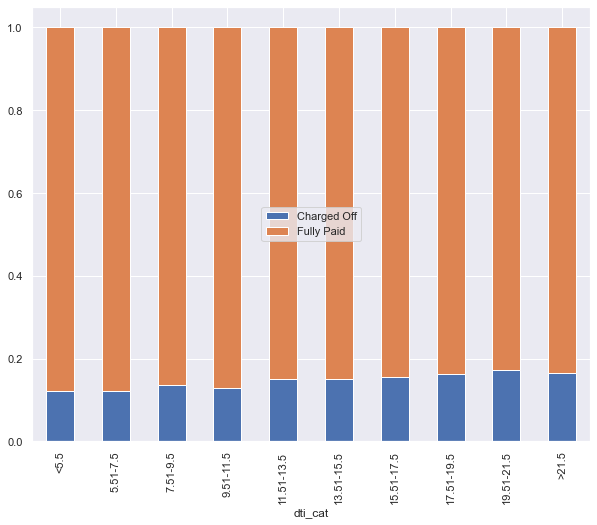

In [91]:
#dti vs loan status



dti_cat = pd.crosstab(m_loandata['dti_cat'], m_loandata['loan_status'], normalize='index')
print(dti_cat)

sns.set(rc = {'figure.figsize':(10,8)})
plt.figure(figsize=(10,8))
#print(finalamt_chkb)
dti_cat.plot.bar(stacked = True);
plt.legend(loc='center');

Observation: Debt to income ratio are directly related to charged off. lower dti are advisable

loan_status         Charged Off  Fully Paid
purpose                                    
car                    0.106738    0.893262
credit_card            0.107818    0.892182
debt_consolidation     0.153254    0.846746
educational            0.172308    0.827692
home_improvement       0.120696    0.879304
house                  0.160763    0.839237
major_purchase         0.103256    0.896744
medical                0.155653    0.844347
moving                 0.159722    0.840278
other                  0.163777    0.836223
renewable_energy       0.186275    0.813725
small_business         0.270810    0.729190
vacation               0.141333    0.858667
wedding                0.103672    0.896328


<Figure size 720x576 with 0 Axes>

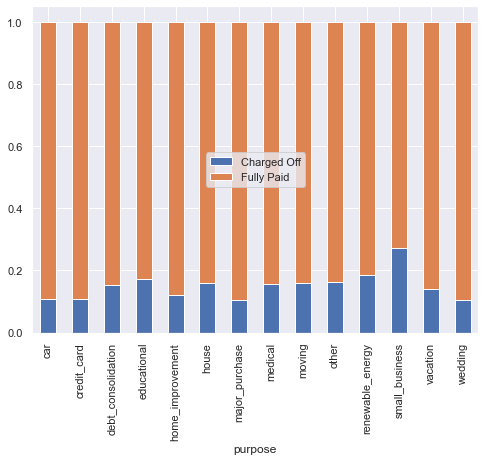

In [67]:
#purpose vs loan status
purpose_cat = pd.crosstab(m_loandata['purpose'], m_loandata['loan_status'], normalize='index')
print(purpose_cat)

sns.set(rc = {'figure.figsize':(8,6)})
plt.figure(figsize=(10,8))
#print(finalamt_chkb)
purpose_cat.plot.bar(stacked = True);
plt.legend(loc='center');

Charged Off are high for  the purpose of small-business 

loan_status  Charged Off  Fully Paid
issue_month                         
Apr             0.130696    0.869304
Aug             0.138135    0.861865
Dec             0.160854    0.839146
Feb             0.122986    0.877014
Jan             0.134931    0.865069
Jul             0.142942    0.857058
Jun             0.151887    0.848113
Mar             0.128948    0.871052
May             0.159644    0.840356
Nov             0.149276    0.850724
Oct             0.154214    0.845786
Sep             0.156375    0.843625


<Figure size 720x576 with 0 Axes>

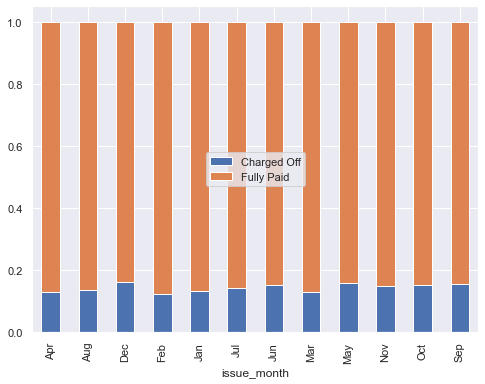

In [68]:
#Issue month
month_cat = pd.crosstab(m_loandata['issue_month'], m_loandata['loan_status'], normalize='index')
print(month_cat)

sns.set(rc = {'figure.figsize':(8,6)})
plt.figure(figsize=(10,8))
#print(finalamt_chkb)
month_cat.plot.bar(stacked = True);
plt.legend(loc='center');

Note: Charged Off are quite high for Q4 (Sep to Dec) but month is not signifcant enough to dtermine charged off or fully paid

loan_status          Charged Off  Fully Paid
verification_status                         
Not Verified            0.128310    0.871690
Source Verified         0.148186    0.851814
Verified                0.168032    0.831968


<Figure size 720x576 with 0 Axes>

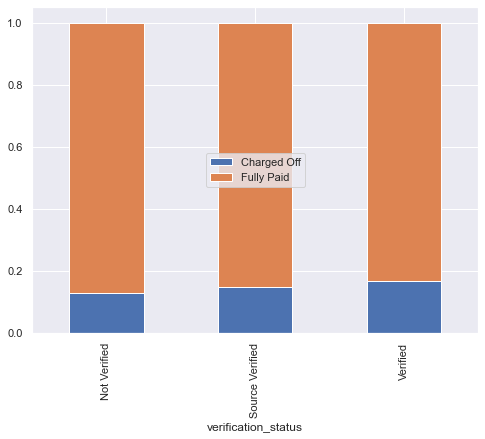

In [69]:
#Verification Status

verf_cat = pd.crosstab(m_loandata['verification_status'], m_loandata['loan_status'], normalize='index')
print(verf_cat)

sns.set(rc = {'figure.figsize':(8,6)})
plt.figure(figsize=(10,8))
#print(finalamt_chkb)
verf_cat.plot.bar(stacked = True);
plt.legend(loc='center');

Note: Not verified source are less charged off 

loan_status     Charged Off  Fully Paid
home_ownership                         
MORTGAGE           0.136713    0.863287
NONE               0.000000    1.000000
OTHER              0.183673    0.816327
OWN                0.148908    0.851092
RENT               0.153626    0.846374


<Figure size 720x576 with 0 Axes>

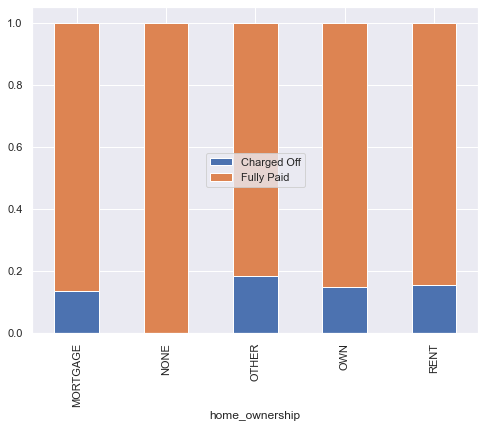

In [75]:

#HOME CATERGORY VS LOAN STATUS
home_cat = pd.crosstab(m_loandata['home_ownership'], m_loandata['loan_status'], normalize='index')
print(home_cat)

sns.set(rc = {'figure.figsize':(8,6)})
plt.figure(figsize=(10,8))
#print(finalamt_chkb)
home_cat.plot.bar(stacked = True);
plt.legend(loc='center');

Observation: Chargedoff are high for Other,Rent

loan_status  Charged Off  Fully Paid
emp_length                          
1 year          0.143894    0.856106
10+ years       0.156810    0.843190
2 years         0.132137    0.867863
3 years         0.138335    0.861665
4 years         0.138241    0.861759
5 years         0.143394    0.856606
6 years         0.141605    0.858395
7 years         0.153711    0.846289
8 years         0.141463    0.858537
9 years         0.128874    0.871126
< 1 year        0.141748    0.858252


<Figure size 720x576 with 0 Axes>

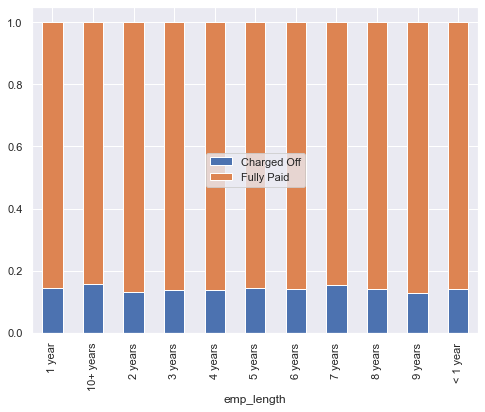

In [76]:
#month vs loan status

emp_length_cat = pd.crosstab(m_loandata['emp_length'], m_loandata['loan_status'], normalize='index')
print(emp_length_cat)

sns.set(rc = {'figure.figsize':(8,6)})
plt.figure(figsize=(10,8))
#print(finalamt_chkb)
emp_length_cat.plot.bar(stacked = True);
plt.legend(loc='center');

Note: Charged Off are high for Emp_Length >10 yrs and <=1 yr . Out of total charged off population ~43% are from these groups.chargedOff in other groups are not enough significantly different from each others.


loan_status  Charged Off  Fully Paid
term                                
 36 months      0.110909    0.889091
 60 months      0.253138    0.746862


<Figure size 720x576 with 0 Axes>

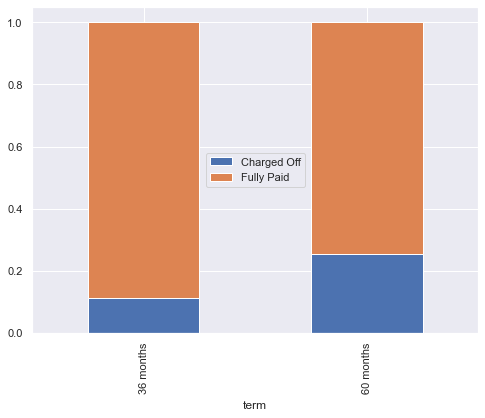

In [77]:

#term vs loan status
term_cat = pd.crosstab(m_loandata['term'], m_loandata['loan_status'], normalize='index')
print(term_cat)

sns.set(rc = {'figure.figsize':(8,6)})
plt.figure(figsize=(10,8))
#print(finalamt_chkb)
term_cat.plot.bar(stacked = True);
plt.legend(loc='center');

Term 60 months: has more than twice the chance of charged off as compare to 36 months. Term 36 months is advisible


loan_status  Charged Off  Fully Paid
grade                               
A               0.059930    0.940070
B               0.122056    0.877944
C               0.171943    0.828057
D               0.219862    0.780138
E               0.268494    0.731506
F               0.326844    0.673156
G               0.337793    0.662207


<Figure size 720x576 with 0 Axes>

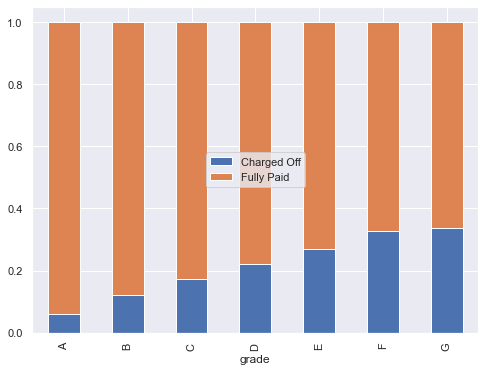

In [78]:
#grade vs loan status
grade_cat = pd.crosstab(m_loandata['grade'], m_loandata['loan_status'], normalize='index')
print(grade_cat)

sns.set(rc = {'figure.figsize':(8,6)})
plt.figure(figsize=(10,8))
#print(finalamt_chkb)
grade_cat.plot.bar(stacked = True);
plt.legend(loc='center');

Note: Higher the Grade lower the chance of charged off, rank ordering

loan_status  Charged Off  Fully Paid
sub_grade                           
A1              0.026339    0.973661
A2              0.049072    0.950928
A3              0.056906    0.943094
A4              0.061956    0.938044
A5              0.079926    0.920074
B1              0.095159    0.904841
B2              0.113943    0.886057
B3              0.120708    0.879292
B4              0.135002    0.864998
B5              0.136138    0.863862
C1              0.163504    0.836496
C2              0.166235    0.833765
C3              0.181452    0.818548
C4              0.175788    0.824212
C5              0.180243    0.819757
D1              0.179377    0.820623
D2              0.210731    0.789269
D3              0.229391    0.770609
D4              0.234205    0.765795
D5              0.250600    0.749400
E1              0.274238    0.725762
E2              0.265472    0.734528
E3              0.230620    0.769380
E4              0.297170    0.702830
E5              0.281654    0.718346
F

<Figure size 720x576 with 0 Axes>

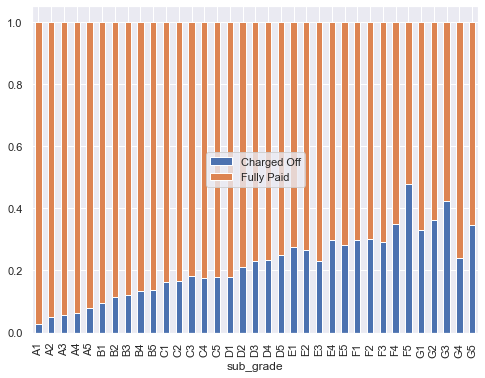

In [74]:
#subgrade vs loan status

subgrade_cat = pd.crosstab(m_loandata['sub_grade'], m_loandata['loan_status'], normalize='index')
print(subgrade_cat)

sns.set(rc = {'figure.figsize':(8,6)})
plt.figure(figsize=(10,8))
#print(finalamt_chkb)
subgrade_cat.plot.bar(stacked = True);
plt.legend(loc='center');

Lower subgrade are having more charged off  but little bit deviation from subgrade E5 onwards..
